In [8]:
## basic modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # for high resolution displays of plots
fontsize_general = 16
plt.rcParams.update({'font.size': fontsize_general,
                     'axes.titlesize': fontsize_general,
                     'axes.labelsize': fontsize_general,
                     'axes.labelpad': 8,
                     'lines.linewidth': 2,
                     'lines.markersize': 8,
                     'xtick.labelsize' : 14,
                     'ytick.labelsize' : 14,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in'})


taken from 

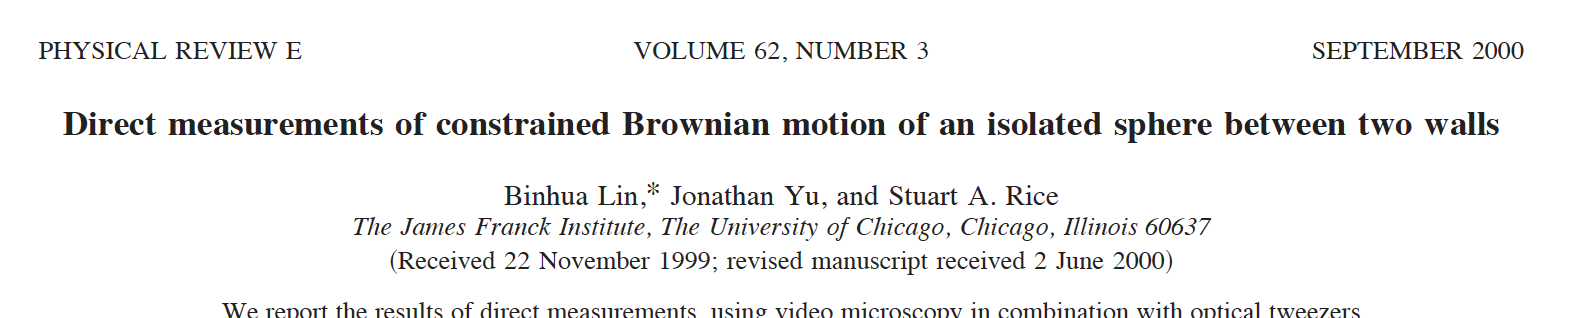

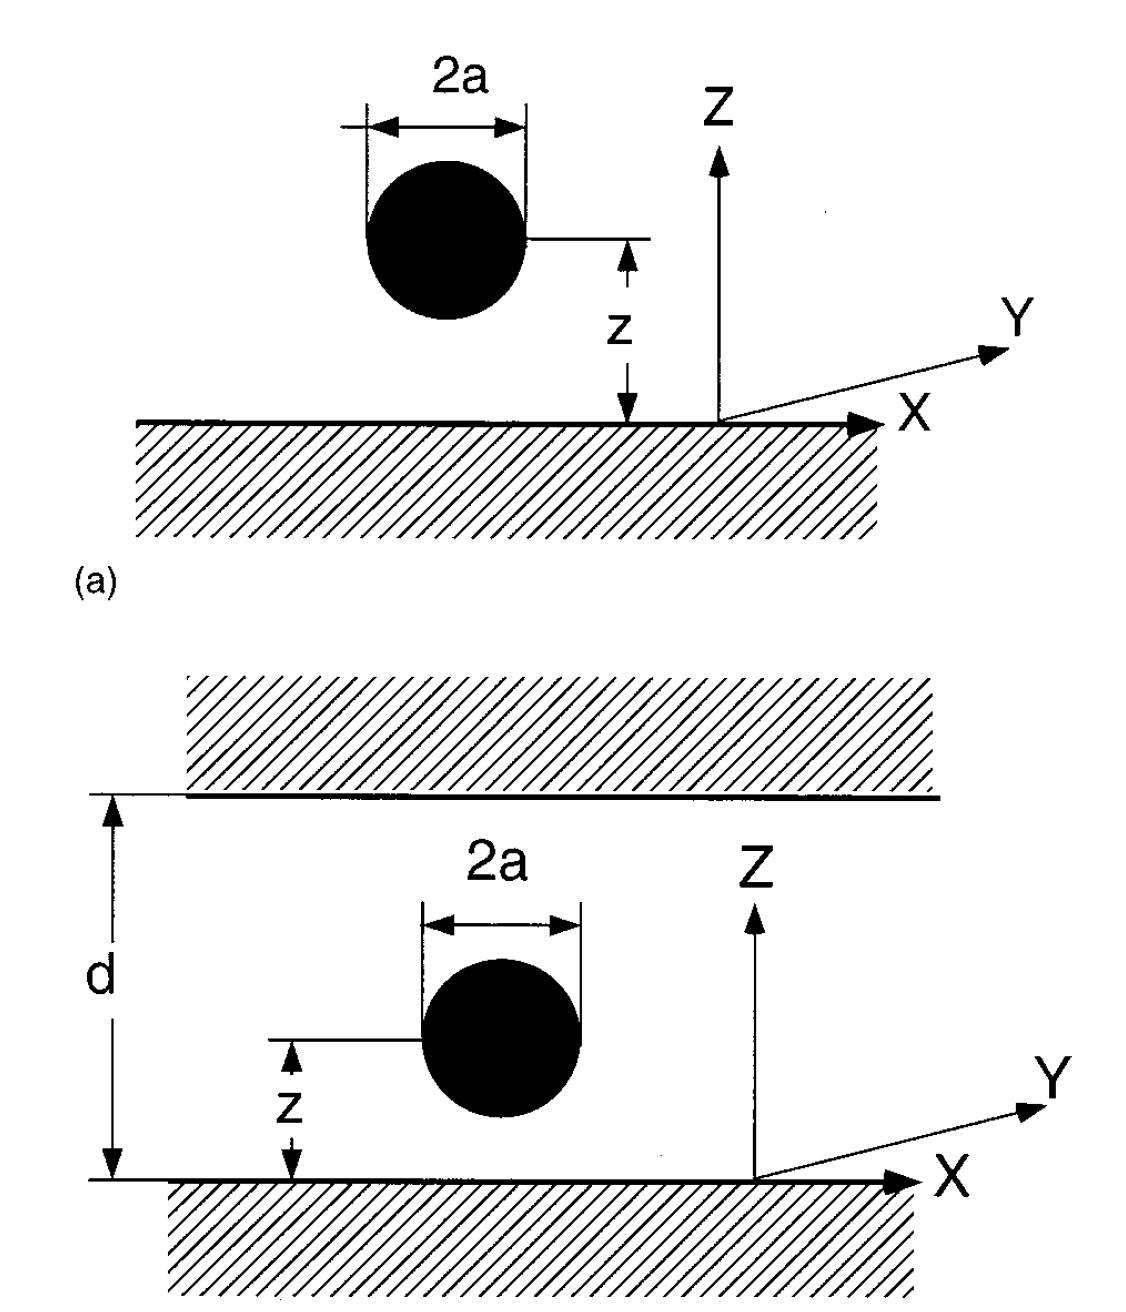

single wall parallel (9)
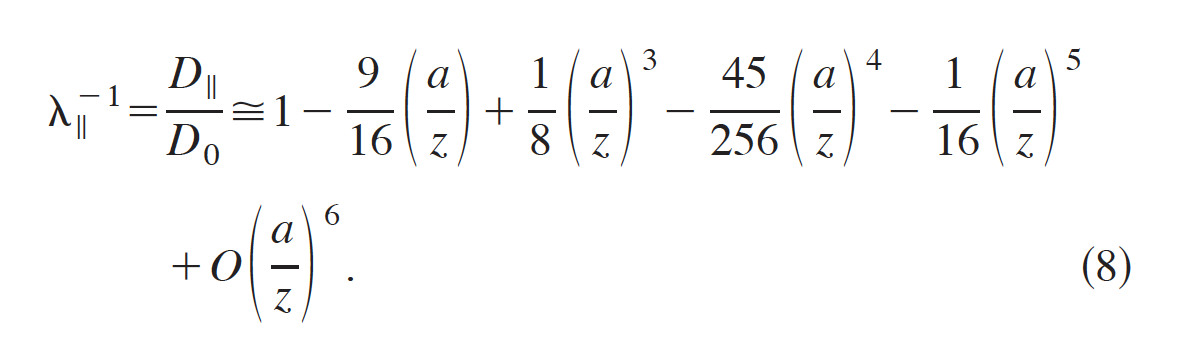

LSA (13)
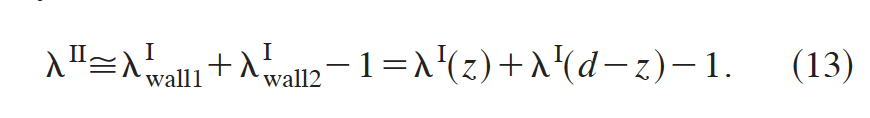

CSA (16)
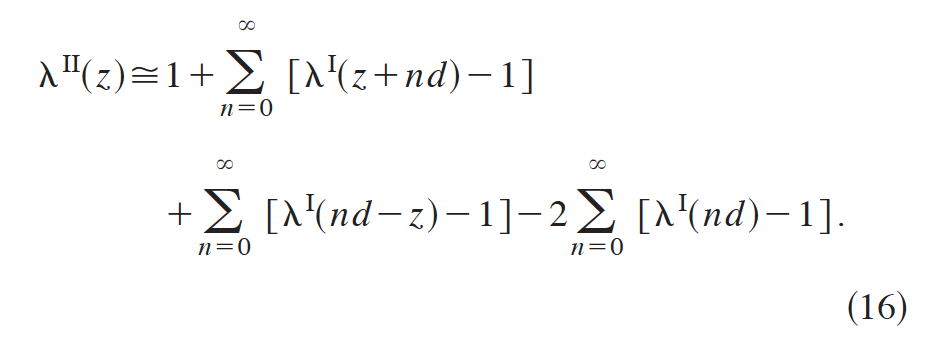


The mean over the sample height
$\langle D \rangle = \int_0^H dz \ D(z)$




In [9]:
# from scipy.special import eval_legendre
class Friction_Correction_near_walls:
    def __init__(self):
        self.Particle_radius = 1e-6 #µm
        
        # for the temperature calcualtion
        self.H = 10
        
    def Single_wall_parallel(self,z_unitless):
        # equation (8)
        correction_factor = 1-9/16/z_unitless + 1/8/z_unitless**3 - 45/256/z_unitless**4 - 1/16/z_unitless**5
        return correction_factor
    
    def Two_walls_middle_Faxen_parallel(self,z_unitless):
        # equation (11)
        correction_factor = 1 - 1.004/z_unitless + 0.418/z_unitless**3 + 0.21/z_unitless**4 - 0.169/z_unitless**5
        return correction_factor
    
    def Two_walls_linear_superposition_parallel(self,z_unitless,H_unitless):
        # equation (13)
        correction_factor_1 = self.Single_wall_parallel(z_unitless)
        correction_factor_2 = self.Single_wall_parallel(H_unitless - z_unitless)
        correction_factor = 1/(1/correction_factor_1 + 1/correction_factor_2 -1)
        return correction_factor
    
    def Two_walls_coherent_superpostition_parallel(self, z_unitless, H_unitless):
        # equation (16)
        n_max = 10
        lmbda = 1
        lmbda += 1/self.Single_wall_parallel(z_unitless)-1
        for n in range(1,n_max+1):
            lmbda += ( 1/self.Single_wall_parallel(n*H_unitless + z_unitless)-1 
                                 + 1/self.Single_wall_parallel(n*H_unitless - z_unitless)-1
                                 -2*(1/self.Single_wall_parallel(n*H_unitless) -1) 
                    )
        correction_factor = 1/lmbda
        return correction_factor
    def Height_average_uniform_Two_walls_linear_superposition_parallel(self, H_unitless):
        # assuming a constat
        z_list = np.linspace(1,H_unitless-1,100)
        correction_list = Correction.Two_walls_linear_superposition_parallel(z_list, H_unitless)
        correction = np.mean(correction_list)
        return correction

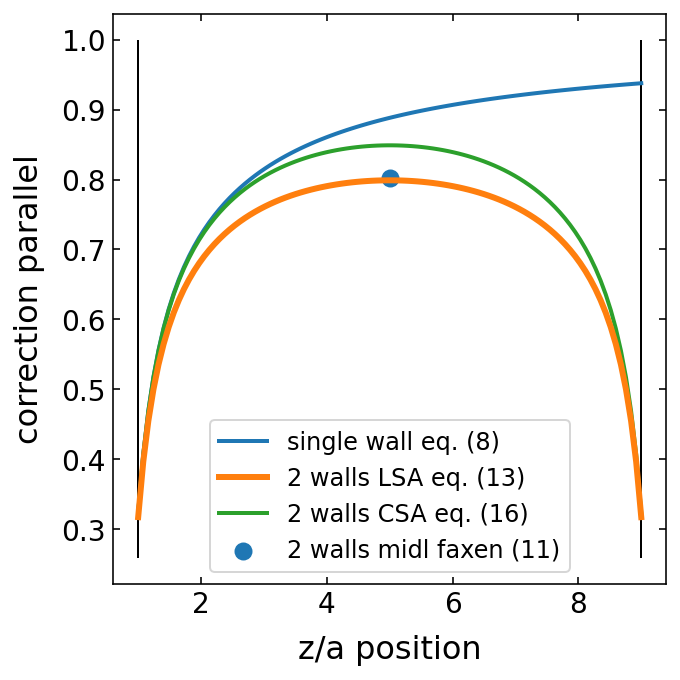

In [10]:
H = 10

Correction = Friction_Correction_near_walls()

z_list = np.linspace(1,H-1,100)
correction_list = Correction.Single_wall_parallel(z_list)
correction_list_2walls = Correction.Two_walls_linear_superposition_parallel(z_list, np.max(z_list)+1)
correction_list_2walls_CSP = Correction.Two_walls_coherent_superpostition_parallel(z_list, np.max(z_list)+1)
z_midl = (np.max(z_list) + np.min(z_list))/2
correction_list_2walls_midl = Correction.Two_walls_middle_Faxen_parallel(z_midl)

fig, ax = plt.subplots(1,1,figsize = (5,5))

ax.plot(z_list,correction_list, label = 'single wall eq. (8)')
ax.plot(z_list,correction_list_2walls, label = '2 walls LSA eq. (13)', lw = 3, zorder = 10)
ax.plot(z_list,correction_list_2walls_CSP, label = '2 walls CSA eq. (16)')
ax.scatter(z_midl,correction_list_2walls_midl, label = '2 walls midl faxen (11)')

ax.vlines(1,np.min(correction_list)*0.8,1, color = 'k', linewidth = 1)
ax.vlines(np.max(z_list),np.min(correction_list)*0.8,1, color = 'k', linewidth = 1)

ax.set_ylabel('correction parallel')
ax.set_xlabel('z/a position')

plt.legend(fontsize = 12)

plt.tight_layout()
plt.show()

## averaging over the sample height

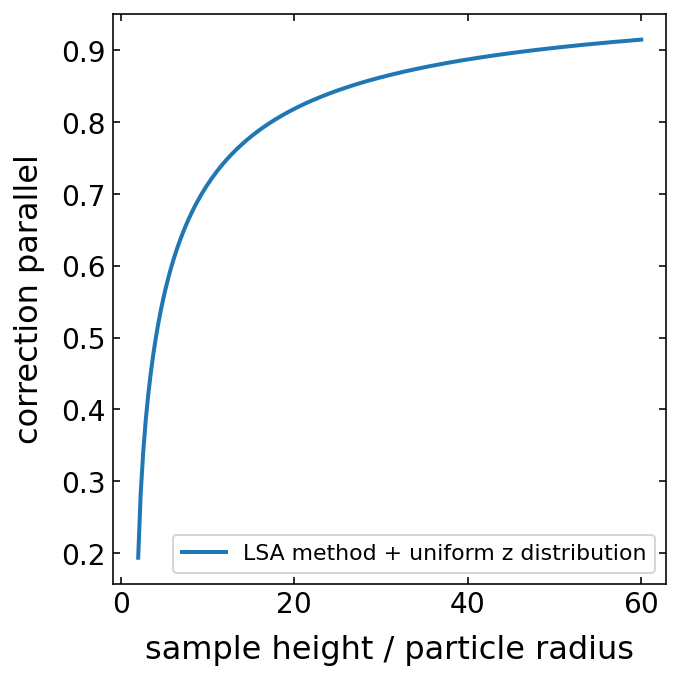

In [11]:
Correction = Friction_Correction_near_walls()

H_list = np.linspace(2,60,200)
correction_list = np.zeros(len(H_list))
for i in range(len(H_list)):
    correction_list[i] = Correction.Height_average_uniform_Two_walls_linear_superposition_parallel(H_list[i])
    
fig, ax = plt.subplots(1,1,figsize = (5,5))

ax.set_xlabel('sample height / particle radius')
ax.set_ylabel('correction parallel')

ax.plot(H_list, correction_list, label = 'LSA method + uniform z distribution')

plt.legend(fontsize = 11)
plt.tight_layout()
plt.show()

# Sample height measurment for Stephans Pillars

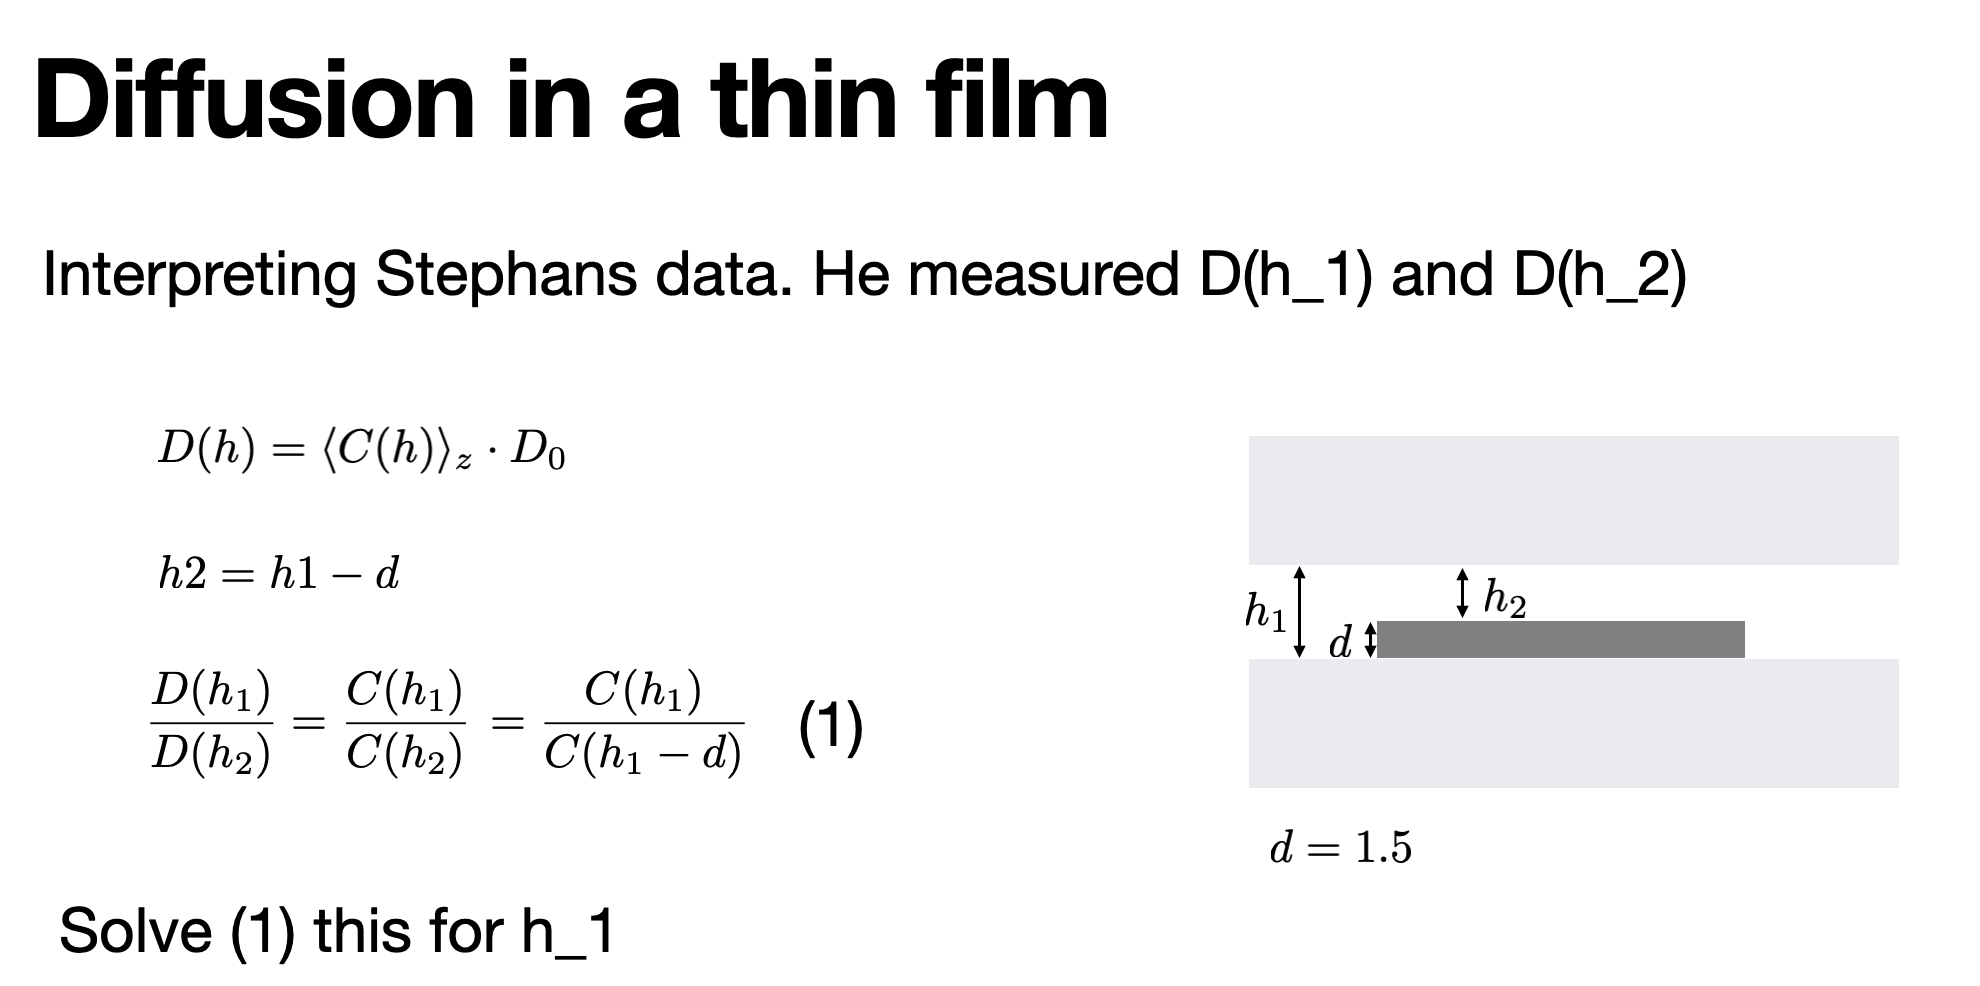

In [17]:
a = 0.3/2
pillar_height = 1.5/a


D_sample = 1.229
D_pillar = 1.173
ratio = D_sample/D_pillar


N = 100
cor_list_sample = np.zeros(N)
cor_list_pillar = np.zeros(N)
Correction = Friction_Correction_near_walls()
height_pillar_list = np.linspace(1.5,50,N)
height_sample_list = height_pillar_list + pillar_height
for i in range(N):
    cor_list_sample[i] = Correction.Height_average_uniform_Two_walls_linear_superposition_parallel(height_sample_list[i])
    cor_list_pillar[i] = Correction.Height_average_uniform_Two_walls_linear_superposition_parallel(height_pillar_list[i])
    
ratio_list = cor_list_sample/cor_list_pillar


height_sample = height_sample_list[ratio_list - ratio == np.min(np.abs(ratio_list - ratio))][0]
height_sample_mum = height_sample*a
height_pillar = height_pillar_list[ratio_list - ratio == np.min(np.abs(ratio_list - ratio))][0]
cor_sample = cor_list_sample[ratio_list - ratio == np.min(np.abs(ratio_list - ratio))][0]
D_bulk = D_sample/cor_sample

In [18]:
print('sample height = {:.4g} µm'.format(height_sample_mum))

sample height = 4.738 µm


In [19]:
print('sample height with pillar = {:.4g} µm'.format(height_pillar*a))

sample height with pillar = 3.238 µm


In [20]:
print(D_bulk)

1.4171153269175991
